# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [75]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.mosaicplot import mosaic

## Task 1 
**1.a:** The values from the data correspond to the description given in the instructions. 

**1.b:** All the columns contain values except for the "weight" column which has 20 missing values. The category column contains a "missing value" labeled as "-".

**1.c:** The missing weight values were replaced with the average weight of the members. The "-" values in the category column were replaced with "unknown". The "Fri." values in the day_of_week column were replaced with "Fri".

In [76]:
# Create fitness class dataframe
df=pd.read_csv('fitness_class_2212.csv')
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [77]:
# Explore data types within each column
df.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [78]:
# Explore number of missing values per column
df.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [79]:
# Determine minimum values for "months_as_member" and "weight"
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [80]:
# Determine if column values are consistent
print(df['day_of_week'].unique())
print(df['category'].unique())

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']
['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']


In [81]:
# Impute missing weight values with average weight of members
df['weight'].fillna(df['weight'].mean(), inplace=True)
df.isnull().sum()


booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [82]:
# Replace column values in category and day_of_week for consistency
df['category'] = df['category'].str.replace("-", "unknown")
df['day_of_week'] = df['day_of_week'].str.replace("Fri.","Fri")\
    .str.replace("Monday","Mon")\
        .str.replace("Wednesday","Wed")
print(df['category'].unique())
print(df['day_of_week'].unique())

['Strength' 'HIIT' 'Cycling' 'Yoga' 'unknown' 'Aqua']
['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']


In [83]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


## Task 2
**2.a:** HIIT is the class with the most observations within the data set with over 600 observations. Thirteen observations were recorded attending an unknown class. The number of observations per class is shown with the bar plot below title "Number of Observations Per Class".

**2.b:** As shown in the bar plot below titled "Attendance by Class", attendance is over 25% over each type of class except for the unknown class attended. Attendance is not evenly distributed amongst the classes with HIIT and Aqua showing the greatest attendance.

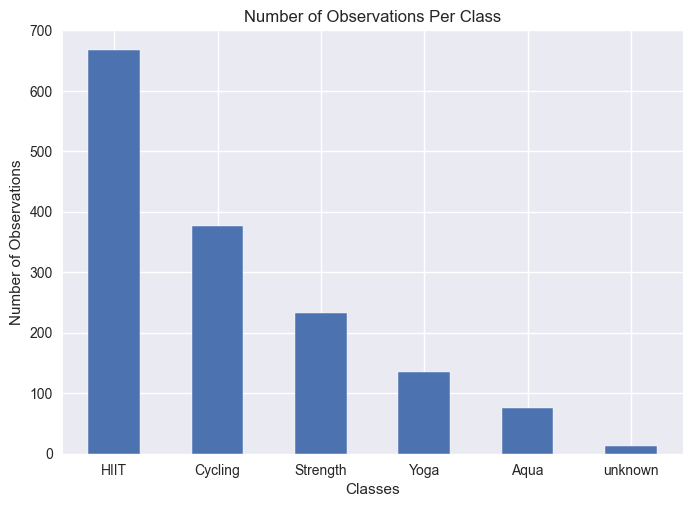

In [84]:
# Barplot of class observation counts
plt.style.use("seaborn")
df['category'].value_counts().plot(kind='bar')
plt.xlabel("Classes")
plt.xticks(rotation=0)
plt.ylabel("Number of Observations")
plt.title("Number of Observations Per Class");

In [85]:
# Number of observations per class
df['category'].value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64

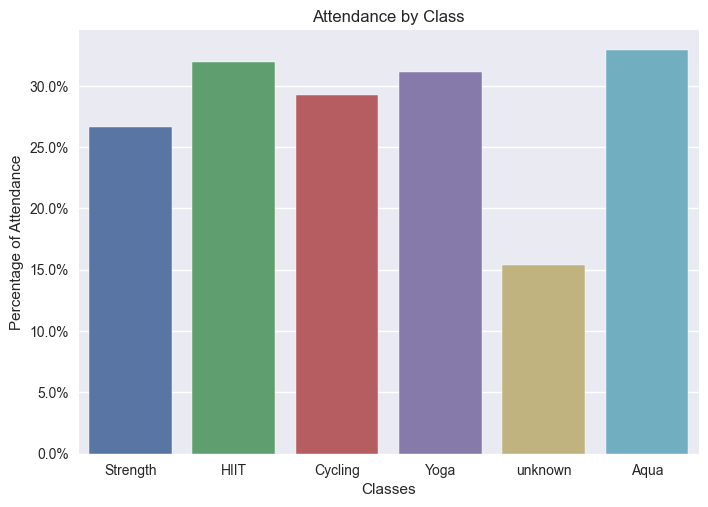

In [86]:
# Barplot of class attendance
sns.barplot(
    data=df,
    x=df['category'],
    y=df['attended'],
    ci=None
)
plt.xlabel("Classes")
plt.ylabel("Percentage of Attendance")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title("Attendance by Class");

In [87]:
# Check results of barplot
df_aqua = df[df['category']=="Aqua"]
df_aqua['attended'].sum()/len(df_aqua)

0.32894736842105265

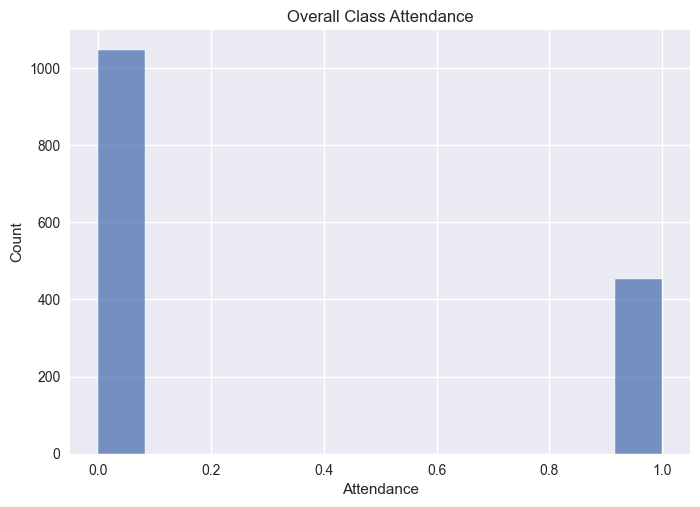

In [88]:
# Histogram of class overall attendance
sns.histplot(
    data=df,
    x=df['attended']
)
plt.xlabel("Attendance")
plt.title("Overall Class Attendance");

## Task 3
Members have been a GoalZone club member for an average of 15.63 months. A few individuals have been a member for over 80 months. The histogram below shows the distribution of length of membership.



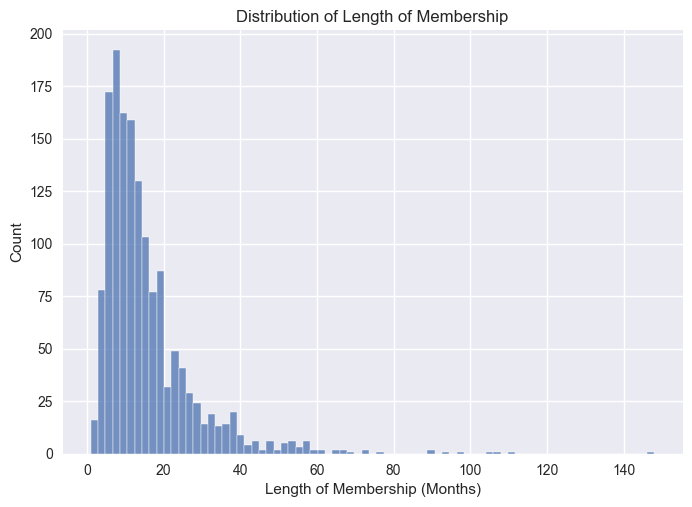

In [89]:
# Histogram membership lengths in months
sns.histplot(
    data=df,
    x=df['months_as_member']
)
plt.xlabel("Length of Membership (Months)")
plt.title("Distribution of Length of Membership");

In [90]:
# Summary statistics of length of membership in months
df['months_as_member'].describe()

count    1500.000000
mean       15.628667
std        12.926543
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max       148.000000
Name: months_as_member, dtype: float64

## Task 4
From the plot shown below, with "1" representing class attendance and "0" representing no attendance, most of the members are between 0 and 40 months. About 30% of these members attend classes. While there are much fewer members over 40 months represented in the data set over 90% of them attend classes.

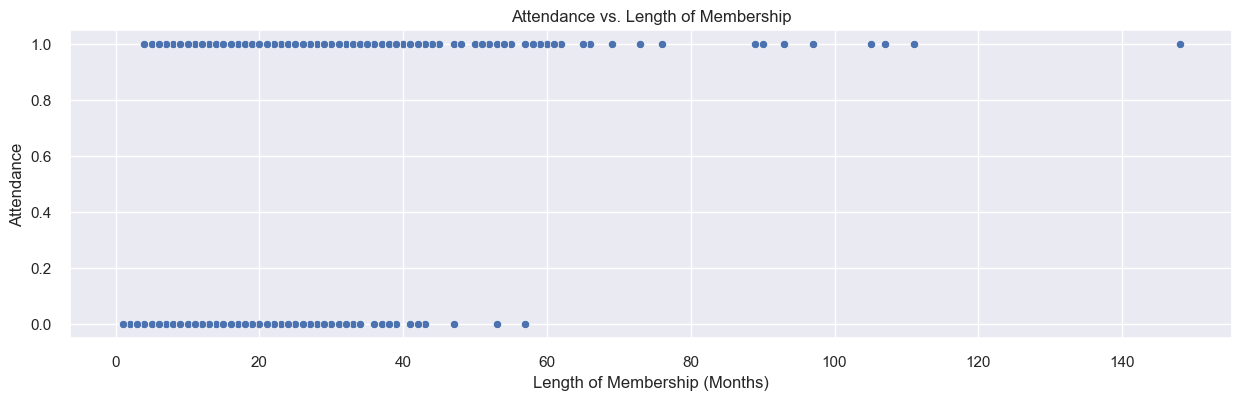

In [91]:
# Scatterplot of attendance vs. length of membership
sns.set(rc={'figure.figsize':(15,4)})
sns.scatterplot(
    data=df,
    x=df['months_as_member'],
    y=df['attended']
)
plt.xlabel("Length of Membership (Months)")
plt.ylabel("Attendance")
plt.title("Attendance vs. Length of Membership");

In [92]:
print("The total number of attendance:", df[df['attended']==1]['attended'].sum())
print("The total number of no attendance:", len(df)-df[df['attended']==1]['attended'].sum())
print("The percentage of overall attedance:", (round(df[df['attended']==1]['attended'].sum()/len(df),2))*100,"%")
print("The percentage of overall no attedance:", 100 - (round(df[df['attended']==1]['attended'].sum()/len(df),2))*100,"%")

The total number of attendance: 454
The total number of no attendance: 1046
The percentage of overall attedance: 30.0 %
The percentage of overall no attedance: 70.0 %


In [93]:
print("The total number of attendance for members between 0 and 40 months:", df[df['months_as_member'].between(0,40)]['attended'].sum())
print("The total number of no attendance for members between 0 and 40 months:", len(df[df['months_as_member'].between(0,40)])-df[df['months_as_member'].between(0,40)]['attended'].sum())
print("The percentage of attendance for members between 0 and 40 months:" , round(df[df['months_as_member'].between(0,40)]['attended'].sum()/len(df[df['months_as_member'].between(0,40)])*100,2),"%")
print("The percentage of no attendance for members between 0 and 40 months:", 100 - round(df[df['months_as_member'].between(0,40)]['attended'].sum()/len(df[df['months_as_member'].between(0,40)])*100,2),"%")

print("The total number of attendance for members over 40 months:", df[df['months_as_member'] >40 ]['attended'].sum())
print("The total number of no attendance for members over 40 months:", len(df[df['months_as_member'] >40 ]['attended'])-df[df['months_as_member'] >40 ]['attended'].sum())


The total number of attendance for members between 0 and 40 months: 393
The total number of no attendance for members between 0 and 40 months: 1040
The percentage of attendance for members between 0 and 40 months: 27.42 %
The percentage of no attendance for members between 0 and 40 months: 72.58 %
The total number of attendance for members over 40 months: 61
The total number of no attendance for members over 40 months: 6


## Task 5
To predict whether a member will attend a class or not, we will need to use a classification machine learning algorithm to determine one of two outcomes, "attended" and "not attended" represented as "1" and "0" respectively in the dataset and the above graphs.

## Task 6
Using a Logistic Regression as a baseline model an accuracy of about 74% was achieved. Looking at the specifity, the model predicted a true negative rate of 89%, meaning that the model has good predictions regarding whether a member will not attend a class. Based on this metric, the club should increase the spaces available for booking as those predicted to miss the class will likely miss the class and the club can maintain it's capacity of 15-25 members per class even when it's shown as fully booked.

In [94]:
# Drop booking_id column due to high cardinality
df.drop(columns="booking_id", inplace=True)


In [95]:
# Extract features and target values
X = df.drop("attended", axis=1)
y = df["attended"]

In [96]:
# Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [97]:
# Convert the non-numeric data into numeric
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print("The shape of df_train is ", X_train.shape)
print("The shape of df_test is ", X_test.shape)

The shape of df_train is  (1200, 47)
The shape of df_test is  (300, 35)


In [98]:
# Reindexing the columns of the test set to align with the train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
print("The shape of df_test is ", X_test.shape)

The shape of df_test is  (300, 47)


In [99]:
# Rescale train and test sets
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.fit_transform(X_test)

In [100]:
# Use a Logistic Regression Model to train the set
logreg = LogisticRegression()
logreg.fit(rescaled_X_train, y_train)

LogisticRegression()

In [101]:
# Use Logistic Regression to predict using test set
y_pred = logreg.predict(rescaled_X_test)

## Task 7
Using a K-Nearest Neighbor as a comparison model an accuracy of about 70% was achieved. Looking at the specifity, the model predicted a true negative rate of 93%, meaning that the model has good predictions regarding whether a member will not attend a class. Based on this metric, the club should increase the spaces available for booking as those predicted to miss the class will likely miss the class and the club can maintain it's capacity of 15-25 members per class even when it's shown as fully booked.

In [102]:
# Use a kNN model for comparison 
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(rescaled_X_train, y_train)
y_pred_knn = knn.predict(rescaled_X_test)


## Task 8
The two models above, Logistic Regression and K-Nearest Neighbors classifier models were used due to their ease of explainability to non-technical stakeholders. The models were used since the data set provided features that can be used to train the models to provide accurate predictions. The data set provided enough features that accurate predictions could be achieved.

The Logistic Regression model was used as a baseline as it uses probabilities to predict attendance, while the K-Nearest Neighbors model uses "majority voting" and so was used for comparison. The two models differ in the basic way they predict the target values and so were good models to use to determine which prediction philosophy produced more accurate predictions.

## Task 9
The accuracy scores and the confusion matrices were used to compare the two models.

In [103]:
# Determine the accuracy of the Logistic Regression Model
print("Accuracy of logistic regression classifier: ", logreg.score(rescaled_X_test, y_test))

# Print the confusion matrix of the Logistic Regression Model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy of logistic regression classifier:  0.7366666666666667
[[179  22]
 [ 57  42]]


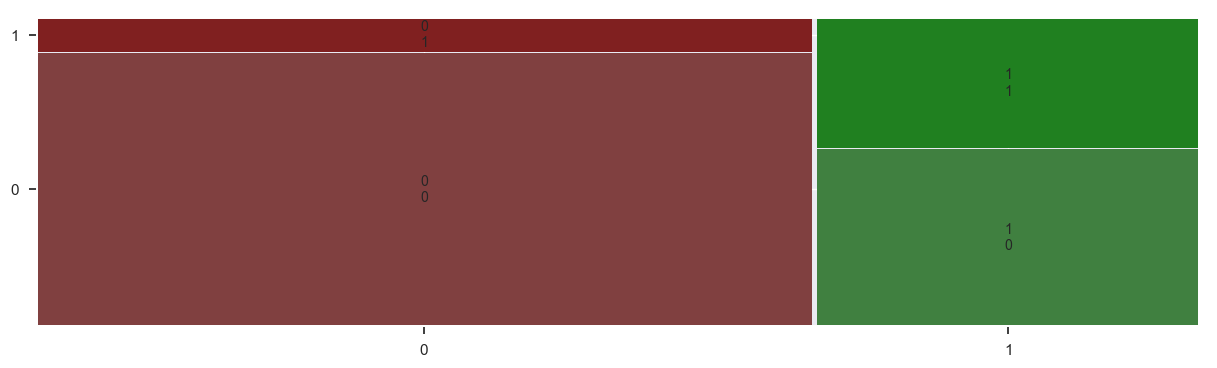

In [104]:
# Visualize the confusion matrix of Logistic Regression model
mosaic(conf_matrix);

In [105]:
TN = conf_matrix[0,0] 
TP = conf_matrix[1,1] 
FN = conf_matrix[1,0] 
FP = conf_matrix[0,1]

sensitivity = TP/(FN+TP)
specificity = TN/(TN+FP)
print("The sensitivity of the Logistic Regression model is ", round(sensitivity,2)*100, "%")
print("The specificity of the Logistic Regression model is ", round(specificity,2)*100, "%")

The sensitivity of the Logistic Regression model is  42.0 %
The specificity of the Logistic Regression model is  89.0 %


Accuracy of K-Nearest Neighbors classifier:  0.6966666666666667
[[187  14]
 [ 77  22]]


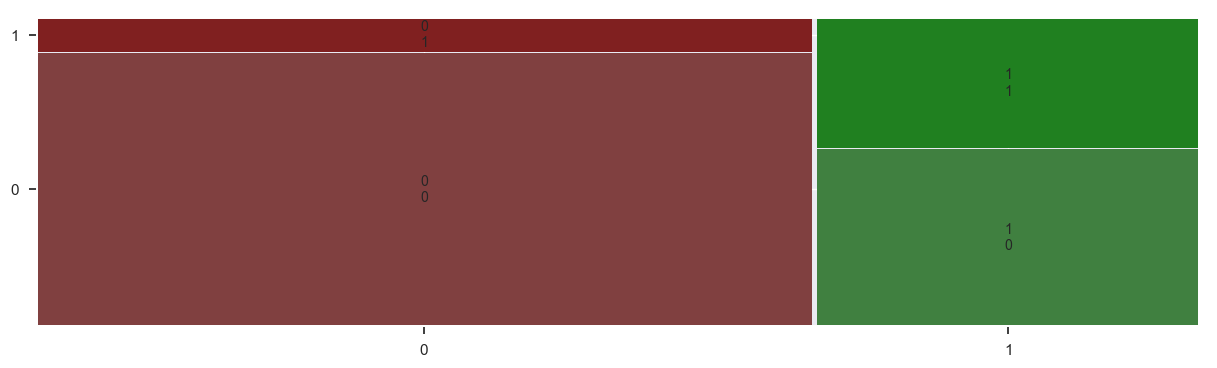

In [106]:
# Determine the accuracy of the K-Nearest Neighbors Model
print("Accuracy of K-Nearest Neighbors classifier: ", knn.score(rescaled_X_test, y_test))
# Print the confusion matrix of the kNN Model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matrix_knn)
# Visualize the confusion matrix of kNN model
mosaic(conf_matrix);

In [107]:
TN_knn = conf_matrix_knn[0,0] 
TP_knn = conf_matrix_knn[1,1] 
FN_knn = conf_matrix_knn[1,0] 
FP_knn = conf_matrix_knn[0,1]

sensitivity_knn = TP_knn/(FN_knn+TP_knn)
specificity_knn = TN_knn/(TN_knn+FP_knn)
print("The sensitivity of the K-Nearest Neighbors model is ", round(sensitivity_knn,2)*100, "%")
print("The specificity of the K-Nearest Neighbors model is ", round(specificity_knn,2)*100, "%")

The sensitivity of the K-Nearest Neighbors model is  22.0 %
The specificity of the K-Nearest Neighbors model is  93.0 %


## Task 10
Overall, both models suggest that GoalZone should increase the spaces available for their classes. The club should increase the spaces available for booking as those predicted to miss the class will likely miss the class, and the club can maintain it's capacity of 15-25 members per class even when it's shown as fully booked. This is also suggested by the "Attendace by Class" graph above, showing only about 30% of members actually attend the class.

The Logistic Regression model had a higher accuracy score (74%) compared to the K-Nearest Neighbors model (70%) because having multiple features to use as predictors work better in determining probabilities for the target values whereas in K-Nearest Neighbors, having multiple features could produce less accuracy by having many more ways the target values can be "close" or "farther apart" to the predictor values, known as the "curse of dimensionality".

While the Logistic Regression model had a higher accuracy score compared to the K-Nearest Neighbors model, the K-Nearest Neighbor model predicted higher true negatives, meaning that the model is more likely to predict whether a member will miss the class. Therefore, the K-Nearest Neighbors model should be used to determine and justify the suggestion above of increasing class spaces for booking. 

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam